# User Interface

In [1]:
import solver
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
print('#############CONSTANTS##########')
print('''atmospheric function: 'exponential' ''')
print('''file_address: '..\data\AltitudeDensityTable.csv' ''')
print('Cd, drag coefficient: 1')
print('Ch, heat transfer coefficient: 0.1')
print('Q, heat of ablation: 1e7')
print('Cl, drag coefficient: 1')
print('alpha, lift coefficient: 1e-3')
print('Rp, planet radius: 6371e3')
print('g, gravitational acceleration: 9.81m/s2')
print('H, atmospheric height: 8000m')
print('rho0, density of air at sea-level: 1.2kg/m3')
print('################################')
print('\n')
print('Would you like to change CONSTANTS (Y) or use default situation (other)?')
c=input('Insert your option: Y/any other: ')
if c=='Y':
    print('#############CONSTANTS##########')
    atm_i=input('Atmospheric function (choose from A.exponential/B.tabular/C.constant/D.Mars): ')
    if atm_i=='B':
        atm='tabular'
    elif atm_i=='C':
        atm='constant'
    elif stm_i=='D':
        atm='mars'
    else:
        atm='exponential'
    file_add=('address of AltitudeDensityTable.csv')
    Cd=input('drag coefficient (USUALLY 1): ')
    Ch=input('heat transfer coefficient (USUALLY 0.1): ')
    Q=input('heat of ablation (USUALLY 1e7), in J/kg: ')
    Cl=input('drag coefficient (USUALLY 1): ')
    alpha=input('lift coefficient (USUALLY 1e-3): ')
    Rp=input('planet radius (earth:6371e3), in m: ')
    g=input('gravitational acceleration (earth:9.81), in m/s2: ')
    H=input('atmospheric height (USUALLY 8000), in m: ')
    rho0=input('density of air at sea-level, (USUALLY 1.2), in kg/m3: ')
else:
    atm='exponential'
    file_add=('..\data\AltitudeDensityTable.csv')
    _Cd=1.
    _Ch=0.1
    _Q=1e7
    _Cl=1e-3
    _alpha=0.3
    _Rp=6371e3
    _g=9.81
    _H=8000.
    _rho0=1.2

#############CONSTANTS##########
atmospheric function: 'exponential' 
file_address: '..\data\AltitudeDensityTable.csv' 
Cd, drag coefficient: 1
Ch, heat transfer coefficient: 0.1
Q, heat of ablation: 1e7
Cl, drag coefficient: 1
alpha, lift coefficient: 1e-3
Rp, planet radius: 6371e3
g, gravitational acceleration: 9.81m/s2
H, atmospheric height: 8000m
rho0, density of air at sea-level: 1.2kg/m3
################################


Would you like to change CONSTANTS (Y) or use default situation (other)?
Insert your option: Y/any other: n


In [3]:
print('Would you like to put in PARAMETERS (Y) or see default Cheryabinsk situation (other)?')
k=input('Insert your option: Y/any other: ')
if k=='Y':
    print('#############PARAMETERS##########')
    atm_i=input('Atmospheric function (choose from A.exponential/B.tabular/C.constant/D.Mars): ')
    if atm_i=='B':
        atm='tabular'
    elif atm_i=='C':
        atm='constant'
    elif stm_i=='D':
        atm='mars'
    else:
        atm='exponential'
    r=input('insert your radius, in m:')
    v=input('insert your velocity, in m/s:')
    rho=input('insert your density, in kg/m3:')
    Y=input('insert your strenth, in kg/(m*s^2):')
    theta=input('insert your angle, in degrees/radians:')
    radtfmask=input('Is your angle in degrees (D) or radians (R):')
    if radtfmask=='D':
        radtf=False
    elif radtfmask=='R':
        radtf=True
    z0=input('insert your initial altitude, in m:')
    timestep=input('insert your timestep (USUALLY 0.1), in s:')
    print('##########go to next step########')
else:
    r=8.2
    v=19200.
    rho=3300.
    Y=5e6
    theta=18.3
    radtf=False
    z0=1e5
    timestep=0.1
    print('#############PARAMETERS##########')
    print('radius = 8.2m')
    print('initial velocity = 19200m/s')
    print('density = 3300kg/m3')
    print('strength = 5*10**6 kg/(m*s^2)')
    print('incident angle = 18.3 degrees')
    print('initial altitude = 100000m (100km)')
    print('timestep = 0.1s')
    print('##########go to next step########')

Would you like to put in PARAMETERS (Y) or see default Cheryabinsk situation (other)?
Insert your option: Y/any other: n
#############PARAMETERS##########
radius = 8.2m
initial velocity = 19200m/s
density = 3300kg/m3
strength = 5*10**6 kg/(m*s^2)
incident angle = 18.3 degrees
initial altitude = 100000m (100km)
timestep = 0.1s
##########go to next step########


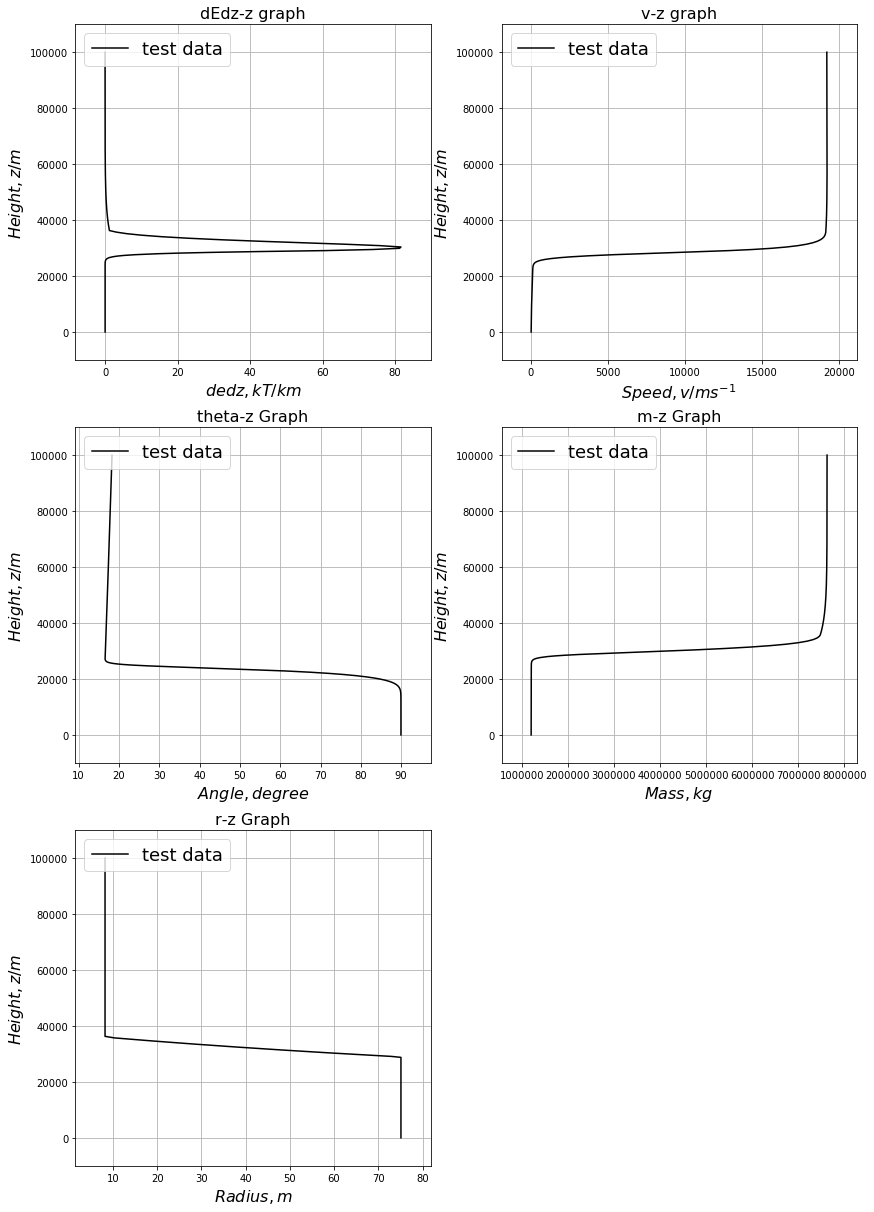

In [4]:
m = solver.Planet(atmos_func=atm, atmos_filename=file_add,
                 Cd=_Cd, Ch=_Ch, Q=_Q, Cl=_Cl, alpha=_alpha, Rp=_Rp,
                 g=_g, H=_H, rho0=_rho0)#(atm, file_add, Cd, Ch, Q, Cl, alpha, Rp, g, H, rho)
# m = solver.Planet(atmos_func=atm, atmos_filename=file_add,
#                  Cd=1., Ch=0.1, Q=1e7, Cl=1e-3, alpha=0.3, Rp=6371e3,
#                  g=9.81, H=8000., rho0=1.2)#(atm, file_add, Cd, Ch, Q, Cl, alpha, Rp, g, H, rho)
df = m.solve_atmospheric_entry(r, v, rho, Y, theta, z0, timestep, radtf)
df2 = m.calculate_energy(df)

def plot_dedz_z(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'k', label='test data')
    ax.set_xlabel('$dedz, kT/km$', fontsize=16)
    ax.set_ylabel('$Height, z/m$', fontsize=16)
    ax.grid(True)
def plot_v_z(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'k', label='test data')
    ax.set_xlabel('$Speed, v/ms^{-1}$', fontsize=16)
    ax.set_ylabel('$Height,z/m$', fontsize=16)
    ax.grid(True)
def plot_theta_z(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'k', label='test data')
    ax.set_xlabel('$Angle, degree$', fontsize=16)
    ax.set_ylabel('$Height,z/m$', fontsize=16)
    ax.grid(True)    
def plot_m_z(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'k', label='test data')
    ax.set_xlabel('$Mass, kg$', fontsize=16)
    ax.set_ylabel('$Height,z/m$', fontsize=16)
    ax.grid(True)
def plot_r_z(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'k', label='test data')
    ax.set_xlabel('$Radius, m$', fontsize=16)
    ax.set_ylabel('$Height,z/m$', fontsize=16)
    ax.grid(True)
    
# def plot_e_z(xi, yi, ax):
#     """plot x vs y on axes ax, 
#     add axes labels and turn on grid
#     """
#     ax.plot(xi, yi, 'k', label='test data')
#     ax.set_xlabel('$Energy, E/kT$', fontsize=16)
#     ax.set_ylabel('$Height, z/m$', fontsize=16)
#     ax.grid(True)
    
fig = plt.figure(figsize=(14,21))
ax1 = fig.add_subplot(321)
ax1.margins(0.1)
plot_dedz_z(df2.dedz, df2.altitude, ax1)
ax1.set_title('dEdz-z graph', fontsize=16)
ax1.legend(loc='upper left', fontsize=18)

ax2 = fig.add_subplot(322)
ax2.margins(0.1)
plot_v_z(df2.velocity, df2.altitude, ax2)
ax2.set_title('v-z graph', fontsize=16)
ax2.legend(loc='upper left', fontsize=18)

ax3 = fig.add_subplot(323)
ax3.margins(0.1)
plot_theta_z(df2.angle, df2.altitude, ax3)
ax3.set_title('theta-z Graph', fontsize=16)
ax3.legend(loc='upper left', fontsize=18)

ax4 = fig.add_subplot(324)
ax4.margins(0.1)
plot_m_z(df2.mass, df2.altitude, ax4)
ax4.set_title('m-z Graph', fontsize=16)
ax4.legend(loc='upper left', fontsize=18)

ax5 = fig.add_subplot(325)
ax5.margins(0.1)
plot_r_z(df2.radius, df2.altitude, ax5)
ax5.set_title('r-z Graph', fontsize=16)
ax5.legend(loc='upper left', fontsize=18)

# ax6 = fig.add_subplot(326)
# ax6.margins(0.1)
# plot_e_z(df2.kinetic_energy, df2.altitude, ax6)
# ax6.set_title('E-z Graph', fontsize=16)
# ax6.legend(loc='upper left', fontsize=18)

plt.savefig('Output graphs.pdf')
plt.show()

# print('Radius of Asteroid: ',test_r,'m')
# print('Density of Asteroid: ',test_rho,'kgm^-3')
# print('Initial Velocity: ',test_v0,'m/s')
# print('Initial Height: 100km')
# print('Angle of injection: ',test_angle,' degrees(aka ',test_angle*np.pi/180,' rad)')
# print('Assumptions: g=0; R_P=infty; C_L=0; no ablation; no fragmentation')

In [5]:
df2

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,19200.000000,7.621564e+06,18.300000,100000.000000,0.000000,8.200000,0.0,-0.017478
1,19200.305544,7.621561e+06,18.286638,99397.342239,1794.893756,8.200000,0.1,-0.017447
2,19200.610685,7.621557e+06,18.273272,98795.100114,3590.121554,8.200000,0.2,-0.017414
3,19200.915408,7.621553e+06,18.259904,98193.273774,5385.683237,8.200000,0.3,-0.017378
4,19201.219699,7.621548e+06,18.246533,97591.863369,7181.578648,8.200000,0.4,-0.017339
5,19201.523540,7.621544e+06,18.233160,96990.869048,8977.807630,8.200000,0.5,-0.017297
6,19201.826912,7.621539e+06,18.219783,96390.290962,10774.370020,8.200000,0.6,-0.017252
7,19202.129798,7.621533e+06,18.206404,95790.129263,12571.265656,8.200000,0.7,-0.017203
8,19202.432176,7.621527e+06,18.193022,95190.384103,14368.494374,8.200000,0.8,-0.017151
9,19202.734023,7.621521e+06,18.179637,94591.055633,16166.056006,8.200000,0.9,-0.017094
